## Helper functions

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

from IPython.display import clear_output


import numpy as np
import random
import tensorflow as tf
import time

from helper import *

random.seed(8)

In [2]:
trainpath = '../data/train'
files = os.listdir(trainpath)
files = [os.path.join(trainpath, f) for f in files]
files[:3]

['../data/train/1B1B1K2-3p1N2-6k1-R7-5P2-4q3-7R-1B6.jpeg',
 '../data/train/1B1B1N2-1r6-n2R2k1-7b-1B6-8-8-Kn6.jpeg',
 '../data/train/1B1B4-1Bp2k2-1K5p-4q3-Nqp4n-3B4-5B2-6r1.jpeg']

../data/train/1B1B4-1Bp2k2-1K5p-4q3-Nqp4n-3B4-5B2-6r1.jpeg


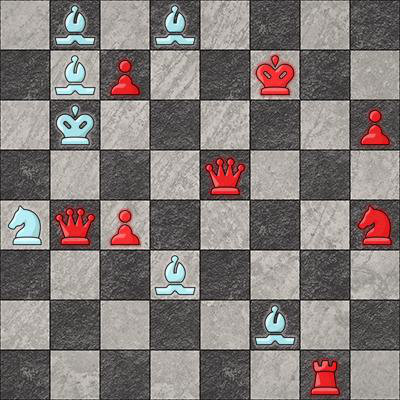

[[ 0  3  0  3  0  0  0  0]
 [ 0  3 -1  0  0 -6  0  0]
 [ 0  6  0  0  0  0  0 -1]
 [ 0  0  0  0 -5  0  0  0]
 [ 2 -5 -1  0  0  0  0 -2]
 [ 0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0 -4  0]]


In [3]:
f = files[2]
im = Image.open(f)
print(f)
display(im)
pgn = fpath_to_pgn(f)
print(pgn_to_np_array(pgn))

In [4]:
train_x = get_X(files[:30])
train_y = get_Y(files[:30])

In [5]:
train_x.shape

(30, 480000)

In [6]:
len(train_y)

64

In [7]:
train_y[0].shape

(30, 13)

### Tensorflow model:

In [8]:
inputs = tf.keras.Input(shape=(480_000,), name='input_layer')
h1 = tf.keras.layers.Dense(100, activation='relu', name='hidden1')(inputs)

out = []
for i in range(64):
    out.append(tf.keras.layers.Dense(13, activation='sigmoid', name='square_'+str(i))(h1))

model = tf.keras.models.Model(inputs=inputs, outputs=out, name='pgn2png')
model.summary()

Model: "pgn2png"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 480000)]     0                                            
__________________________________________________________________________________________________
hidden1 (Dense)                 (None, 100)          48000100    input_layer[0][0]                
__________________________________________________________________________________________________
square_0 (Dense)                (None, 13)           1313        hidden1[0][0]                    
__________________________________________________________________________________________________
square_1 (Dense)                (None, 13)           1313        hidden1[0][0]                    
____________________________________________________________________________________________

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [10]:
hist = model.fit(train_x, train_y, epochs=100, verbose=0, shuffle=False)

In [11]:
hist.history['square_0_loss']

[2.4515798,
 1.9459151,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9459101,
 1.9

In [12]:
model.predict(train_x[:1])

[array([[0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.]],
       dtype=float32),
 array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.]],
       dtype=float32),
 array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
         1.000000e+00, 0.000000e+00, 0.000000e+00, 1.333638e-11,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
         0.000000e+00]], dtype=float32),
 array([[0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.]],
       dtype=float32),
 array([[0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.]],
       dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.]],
       dtype=float32),
 array([[1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]],
       dtype=float32),
 array([[0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.]],
       dtype=float32),
 array([[0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.]],
       dtype=float32),
 array([[0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.]],
       dtype=